###### AIM

Estimate overall customer satisfaction of a company accurately using a probability sampling technique

###### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

###### Loading dataset

In [2]:
df = pd.read_csv("cleaned_reviews.csv", parse_dates = ['reviews.date'])

In [3]:
#view head
df.head()

,brand,categories,name,reviews.rating,reviews.date
0,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,5.0,2015-08-08 00:00:00+00:00
1,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,5.0,2015-09-01 00:00:00+00:00
2,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,4.0,2015-07-20 00:00:00+00:00
3,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,5.0,2017-06-16 00:00:00+00:00
4,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,5.0,2016-08-11 00:00:00+00:00


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   brand           1177 non-null   object             
 1   categories      1177 non-null   object             
 2   name            1177 non-null   object             
 3   reviews.rating  1177 non-null   float64            
 4   reviews.date    960 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 46.1+ KB


###### population size

In [5]:
ratings = df['reviews.rating']
N = len(ratings)
print(f"Population size N = {N}")

Population size N = 1177


###### Simple Random Sampling(SRS)

sample size

In [6]:
#using 10%
fraction = 0.10  
n = int(round(N * fraction))
sample = ratings.sample(n=n, replace=False, random_state=42).reset_index(drop=True)
print(f"Sample size n = {n}")

Sample size n = 118


population vs sample statistics

In [9]:
pop_mean = ratings.mean()
pop_std = ratings.std(ddof=0)
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)

print("\n Means & Std ")
print(f"Population mean = {pop_mean:.4f}, Population std = {pop_std:.4f}")
print(f"Sample mean = {sample_mean:.4f}, Sample std = {sample_std:.4f}")


 Means & Std 
Population mean = 4.3594, Population std = 1.0210
Sample mean = 4.2373, Sample std = 1.0914


###### Observations:

The sample mean (4.2373) is slightly lower than the population mean (4.3594).
* This is normal; random sampling can cause small differences.

The sample standard deviation (1.0914) is slightly higher than the population std (1.0210).
* This is also normal; smaller samples can be more spread out.

standard error

In [10]:
fpc = sqrt((N - n) / (N - 1))
se = sample_std / sqrt(n) * fpc
print(f"Standard error (with FPC) = {se:.6f}")


Standard error (with FPC) = 0.095340


95% confidence interval

In [11]:
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
moe = z * se
ci_lower = sample_mean - moe
ci_upper = sample_mean + moe

print("\n 95% Confidence Interval ")
print(f"Margin of Error = {moe:.4f}")
print(f"95% CI = ({ci_lower:.4f}, {ci_upper:.4f})")


 95% Confidence Interval 
Margin of Error = 0.1869
95% CI = (4.0504, 4.4242)


###### Results

* Sample mean: 4.2373

* Margin of Error: 0.1869

* 95% CI: (4.0504, 4.4242)

###### Interpretation

* The margin of error (0.1869) tells that the sample mean could vary by about ±0.19 from the true population mean due to sampling variability.

 The 95% confidence interval means:
* We are 95% confident that the true population mean of customer ratings lies between 4.0504 and 4.4242.

* Since the population mean (4.3594) falls inside this interval, it confirms that your sample mean is a reasonable estimate of the population mean.

The sample appears representative, and SRS worked well for this dataset.

###### Visualizations

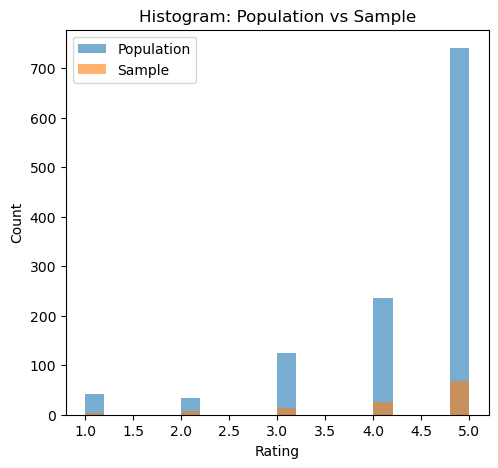

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(ratings, bins=20, alpha=0.6, label='Population')
plt.hist(sample, bins=20, alpha=0.6, label='Sample')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram: Population vs Sample')
plt.legend()
plt.show()

###### Observations

The shape of the sample distribution closely follows the population distribution, with peaks around ratings 4 and 5.

Lower ratings (1–3) are slightly underrepresented in the sample, which is expected with random variation.

Overall, the sample captures the population trend well, supporting that the SRS is representative.

This visual aligns with the computed mean, SE, and CI, confirming that the sample provides a reliable estimate of customer satisfaction

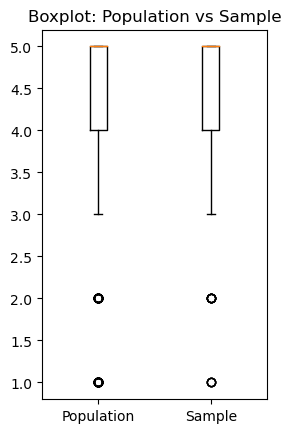

In [14]:
# Boxplot
plt.subplot(1,2,2)
plt.boxplot([ratings, sample], labels=['Population','Sample'])
plt.title('Boxplot: Population vs Sample')
plt.show()

###### Interpretation

The median, interquartile range (IQR), and overall spread of the sample align well with the population.

Outliers appear in the same positions for both, which confirms that the SRS captured the variability of the population.

The symmetry and range are consistent, showing the sample is representative